In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio
import cv2

Загрузка картинки. Ясеное дело - кошечку.

In [2]:
img = imageio.imread('cat_alice.png')

In [3]:
print(img.shape)

(3270, 1895, 3)


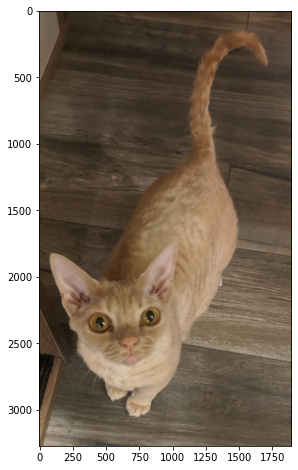

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

Преобразование в черно-белый вариант

In [5]:
img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Еще один вариант получения черно-белого изображения из цветного
#img_bw = np.mean(img, axis=2)

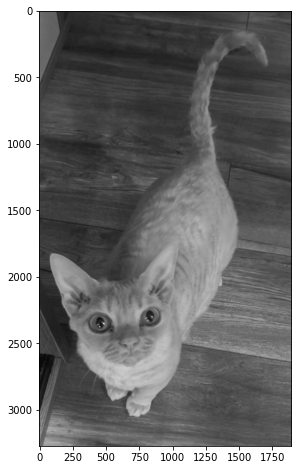

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

Создание негатива. Замена яркости на противоположную в каждом из 3-х слоев

In [7]:
img_negative = np.copy(255 - img)

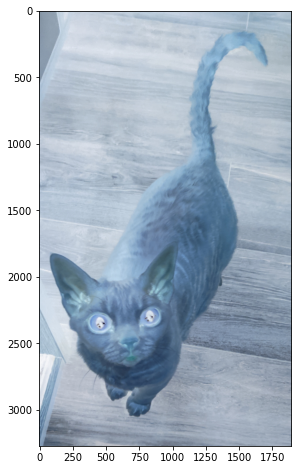

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img_negative)

Вывод каждого канала в отдельности

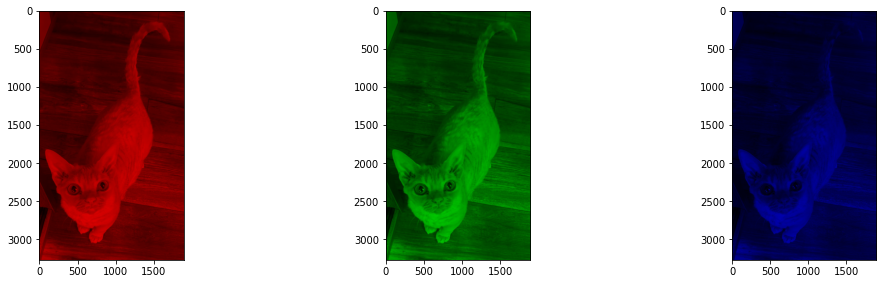

In [9]:
fig = plt.figure(figsize=(15, 24))

img_r = np.copy(img)
img_r[:, :, 1] = 0
img_r[:, :, 2] = 0
sub1 = fig.add_subplot(1, 5, 1)
sub1.imshow(img_r)

img_g = np.copy(img)
img_g[:, :, 0] = 0
img_g[:, :, 2] = 0
sub2 = fig.add_subplot(1, 5, 3)
sub2.imshow(img_g)

img_b = np.copy(img)
img_b[:, :, 0] = 0
img_b[:, :, 1] = 0
sub3 = fig.add_subplot(1, 5, 5)
sub3.imshow(img_b)

Усреднение интенсивности по всем трем каналам в каждой точке

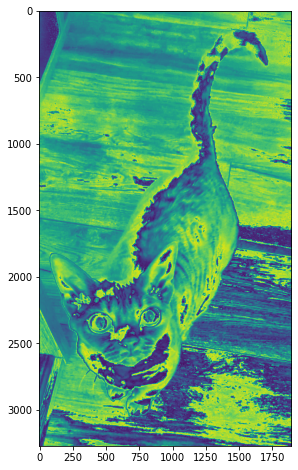

In [10]:
img_middle = np.copy((img[:, :, 0]+img[:, :, 1]+img[:, :, 2]) / 3)
plt.figure(figsize=(8, 8))
plt.imshow(img_middle)

Перевод цветового пространства в иную систему координат.

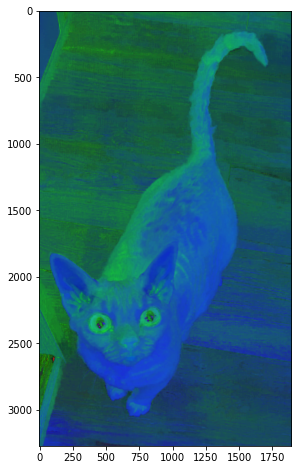

In [11]:
from skimage.color import rgb2hsv, hsv2rgb
img_hsv = rgb2hsv(img)
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

Увеличение насыщенности

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


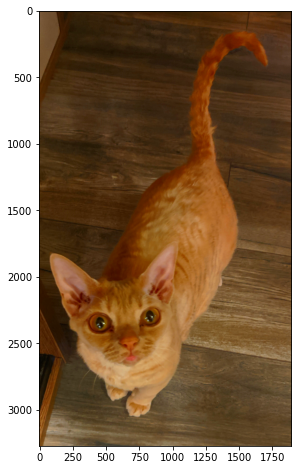

In [12]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 2
img_new = hsv2rgb(img_hsv_new)
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

Выделение горизонтальных и вертигальных границ на рисунке

In [34]:
%%time
win_size = (3, 3)

w_v = np.zeros(win_size, dtype = np.int8)
w_v[:, 0] = -1
w_v[:, 2] = 1

w_h = np.zeros(win_size, dtype = np.int8)
w_h[0] = -1
w_h[2] = 1

out_img_1 = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1),
     dtype = np.float32
)

for i in range(out_img_1.shape[0]):
  for j in range(out_img_1.shape[1]):
    x = img_bw[i:i+win_size[0], j:j+win_size[1]]
    out_img_1[i, j] = np.abs(np.sum(x * w_v))

out_img_2 = np.zeros(
    (out_img_1.shape[0] - win_size[0] + 1,
     out_img_1.shape[1] - win_size[1] + 1),
     dtype = np.float32
)

for i in range(out_img_2.shape[0]):
  for j in range(out_img_2.shape[1]):
    x = img_bw[i:i+win_size[0], j:j+win_size[1]]
    out_img_2[i, j] = np.abs(np.sum(x * w_h)) + out_img_1[i, j]


CPU times: user 2min 9s, sys: 223 ms, total: 2min 9s
Wall time: 2min 9s


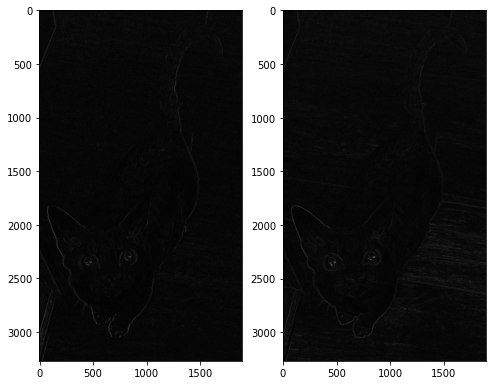

In [37]:
fig = plt.figure(figsize=(8, 16))

sub1 = fig.add_subplot(1, 2, 1)
sub1.imshow(out_img_1, cmap='gray')

sub2 = fig.add_subplot(1, 2, 2)
sub2.imshow(out_img_2, cmap='gray')